In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Use this sample data to conduct experimentation

control = np.array([166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,
                    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,
                    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155])

experimental = np.array([ 83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
                         101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                         97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
                         116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76])


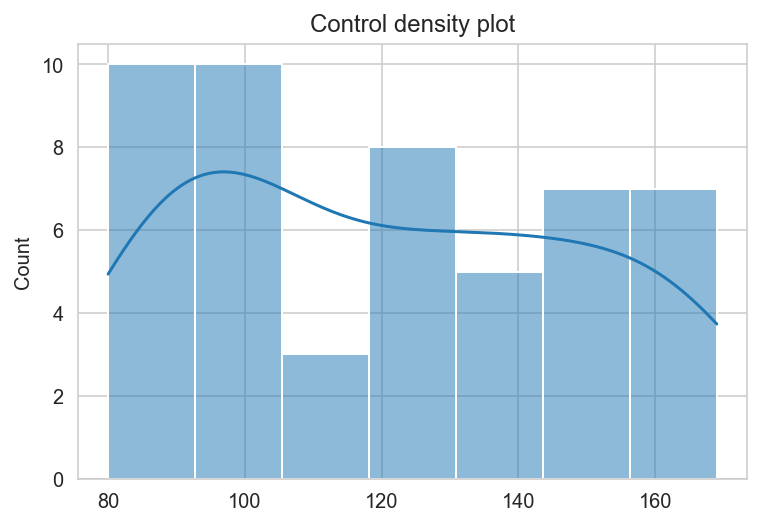

In [8]:
# Create a plot showing overlapping of distribution means and sds for inspection
#control plot
sns.histplot(control, kde=True)
plt.title("Control density plot");


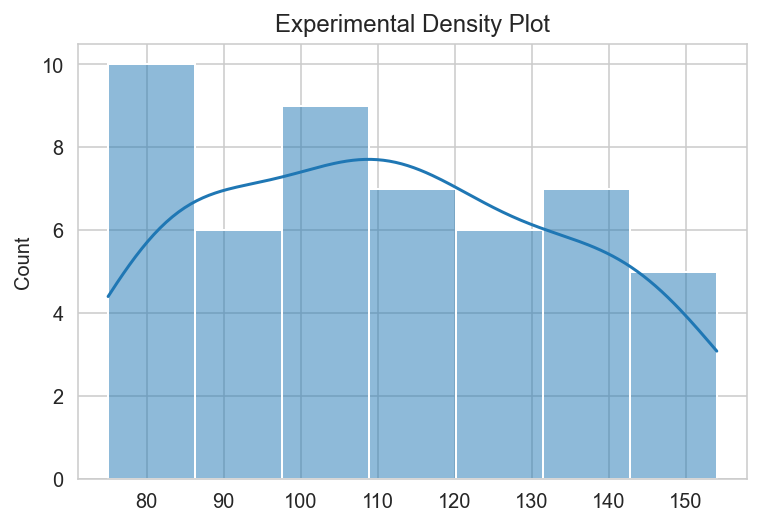

In [9]:
#Experimental density plot
sns.histplot(experimental, kde=True)
plt.title("Experimental Density Plot");

H0: The mean difference between treatment and control group is zero

Ha: The parameter interest, our mean difference between treatment and control group, is different than zero

In [12]:
#calculating differnce between the groups
mean_diff = experimental.mean() - control.mean()
diff

-9.819999999999993

Calculating pooled sample variance

The $s_p^2$ denotes the sample variance. In this version of the t-test, you are assuming equal variances in our experimental and control groups in the overall population. There is another way to calculate the t-test where equal variance is not assumed, but in this case, it is a reasonable assumption.

This approach combines the variance of the two group's variance measurements into a single, pooled metric.

Now, create some functions to calculate the t-statistic. The first function to create is one that calculates the variance for a single sample.

In [13]:
def sample_variance(sample):
    n = len(sample) #length of the sample
    mean = sum(sample)/n #sample mean
    variance = sum((x - mean)**2 for x in sample) / (n-1) #calculating of variance
    return variance

Using sample_variance, you can now write another function pooled_variance to calculate 
s
p
2

In [15]:
def pooled_variance(sample1, sample2):
    #sample size for both samples
    n1 = len(sample1)
    n2 = len(sample2)

    #sample variance for both
    var1 = sample_variance(sample1)
    var2 = sample_variance(sample2)

    pooled_var = ((n1 - 1) *var1 + (n2-1) *var2) / (n1+n2 -2)

    return pooled_var

Now that you have $s_p^2$, create a function twosample_tstatistic to calculate the two sample t-statistic using the formula given earlier.

In [19]:
def twosample_ttest(expr, ctrl):
    #mean of expr and ctrl
    mean_expr = sum(expr) / len(expr)
    mean_ctrl = sum(ctrl) / len(ctrl)

    #the size of expr and ctrl
    n1 = len(expr)
    n2 = len(ctrl)

    #pooled variance
    pooled_var = pooled_variance(expr, ctrl)

    #calcuate the t-stat
    t_stat  = (mean_expr - mean_ctrl) / (pooled_var * ((1/n1) + (1/n2))) **0.5
    
    return t_stat

In [20]:
t_stat = twosample_ttest(experimental, control)
t_stat

-1.8915462966190268

Using the data from the samples, you can now determine the critical values with the t-statistic and calculate the area under the curve to determine the p-value.

Write a function visualize_t that uses matplotlib to display a standard t-distribution with vertical lines identifying each critical value that signifies the rejection region.

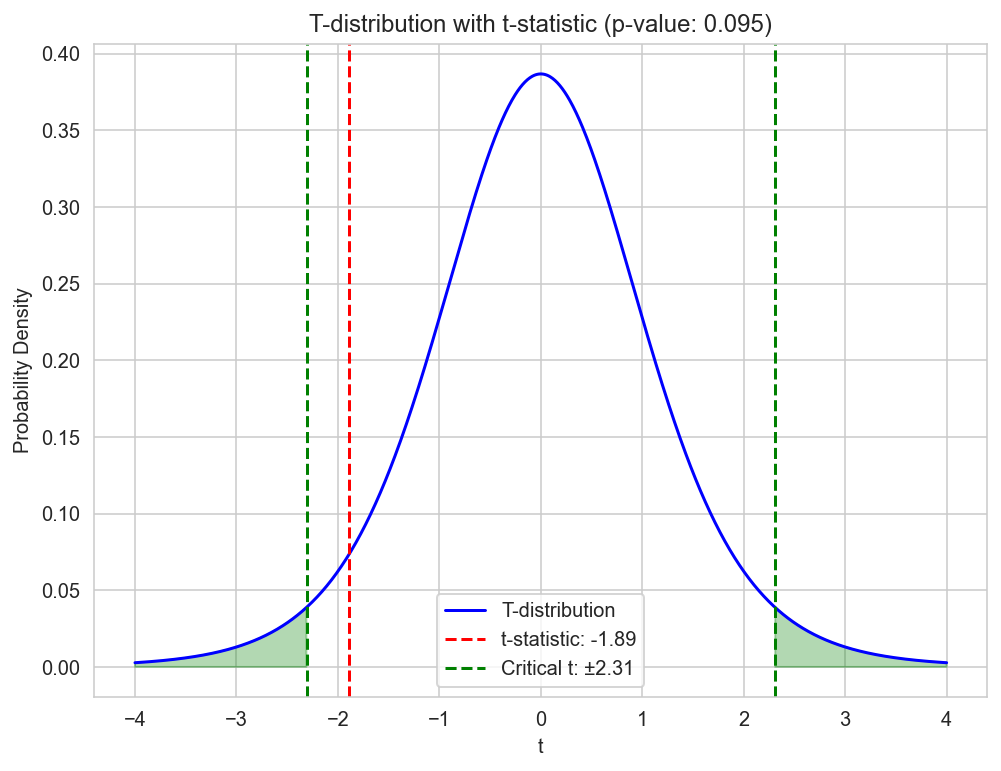

P-value: 0.09519905796850425


In [21]:

def visualize_t(t_stat, n_control, n_experimental, alpha=0.05):
    # Degrees of freedom
    df = n_control + n_experimental - 2

    # Initialize a matplotlib figure
    plt.figure(figsize=(8, 6))

    # Generate points on the x-axis between -4 and 4 (this range can be adjusted)
    x = np.linspace(-4, 4, 1000)

    # Get values on the probability density function (PDF) for the t-distribution
    y = stats.t.pdf(x, df)

    # Plot the t-distribution
    plt.plot(x, y, label='T-distribution', color='blue')

    # Mark the t-statistic on the plot
    plt.axvline(t_stat, color='red', linestyle='--', label=f't-statistic: {t_stat:.2f}')

    # Draw two-sided boundaries for critical-t at significance level alpha
    critical_t = stats.t.ppf(1 - alpha / 2, df)
    plt.axvline(critical_t, color='green', linestyle='--', label=f'Critical t: ±{critical_t:.2f}')
    plt.axvline(-critical_t, color='green', linestyle='--')

    # Shade the critical region (tails)
    plt.fill_between(x, 0, y, where=(x >= critical_t) | (x <= -critical_t), color='green', alpha=0.3)

    # Calculate and display the p-value
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))  # Two-tailed p-value
    plt.title(f'T-distribution with t-statistic (p-value: {p_value:.3f})')
    plt.xlabel('t')
    plt.ylabel('Probability Density')
    plt.legend()

    # Show the plot
    plt.show()

    return p_value

# Example usage:
n_control = 5
n_experimental = 5
p_value = visualize_t(t_stat, n_control, n_experimental)
print(f"P-value: {p_value}")


In [22]:
## Calculate p_value
# Lower tail comulative density function returns area under the lower tail curve
lower_tail = stats.t.cdf(-1.89, (50+50-2), 0, 1)
# Upper tail comulative density function returns area under upper tail curve
upper_tail = 1. - stats.t.cdf(1.89, (50+50-2), 0, 1)

p_value = lower_tail+upper_tail
print(p_value)

0.061713104303855605
